#### Importing the Relevant Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

#### Loading the Dataset

In [6]:
df = pd.read_csv(r"C:\Users\hp\Documents\Turbham Tech\merged_diabetes_dataset.csv")
df.head()

,Sex,Age,BMI,HighBP,HighChol,CholCheck,Smoker,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,HeartDiseaseorAttack,Diabetes_binary
0,2.0,70.0,9.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
1,2.0,60.0,11.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
2,2.0,50.0,12.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
3,2.0,42.0,11.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,2.0,26.0,13.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


In [8]:
df.shape

(70843, 13)

In [10]:
# Map 'Sex' feature to binary values: 0 for Female, 1 for Male
df['Sex'] = df['Sex'].map({2.: 1, 1.: 1, 0.: 0})

# Verify the transformation
print(df['Sex'].value_counts())


Sex
0    38445
1    32398
Name: count, dtype: int64


In [12]:
# Check the updated DataFrame
print(df[['Sex']].head())

   Sex
0    1
1    1
2    1
3    1
4    1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70843 entries, 0 to 70842
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sex                   70843 non-null  int64  
 1   Age                   70843 non-null  float64
 2   BMI                   70843 non-null  float64
 3   HighBP                70843 non-null  float64
 4   HighChol              70843 non-null  float64
 5   CholCheck             70843 non-null  float64
 6   Smoker                70843 non-null  float64
 7   PhysActivity          70843 non-null  float64
 8   Fruits                70843 non-null  float64
 9   Veggies               70843 non-null  float64
 10  HvyAlcoholConsump     70843 non-null  float64
 11  HeartDiseaseorAttack  70843 non-null  float64
 12  Diabetes_binary       70843 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 7.0 MB


In [16]:
df.columns

Index(['Sex', 'Age', 'BMI', 'HighBP', 'HighChol', 'CholCheck', 'Smoker',
       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'HeartDiseaseorAttack', 'Diabetes_binary'],
      dtype='object')

#### Developing New features

In [19]:
# Create the Health Risk Index
df['Health_Risk_Index'] = df['HighBP'] + df['HighChol'] + df['HeartDiseaseorAttack'] + (df['BMI'] / df['BMI'].max())

# Display the first few rows with the new feature
print(df[['HighBP', 'HighChol', 'HeartDiseaseorAttack', 'BMI', 'Health_Risk_Index']].head())


   HighBP  HighChol  HeartDiseaseorAttack   BMI  Health_Risk_Index
0     1.0       1.0                   0.0   9.0           2.091837
1     1.0       1.0                   0.0  11.0           2.112245
2     1.0       1.0                   0.0  12.0           2.122449
3     1.0       1.0                   0.0  11.0           2.112245
4     1.0       1.0                   0.0  13.0           2.132653


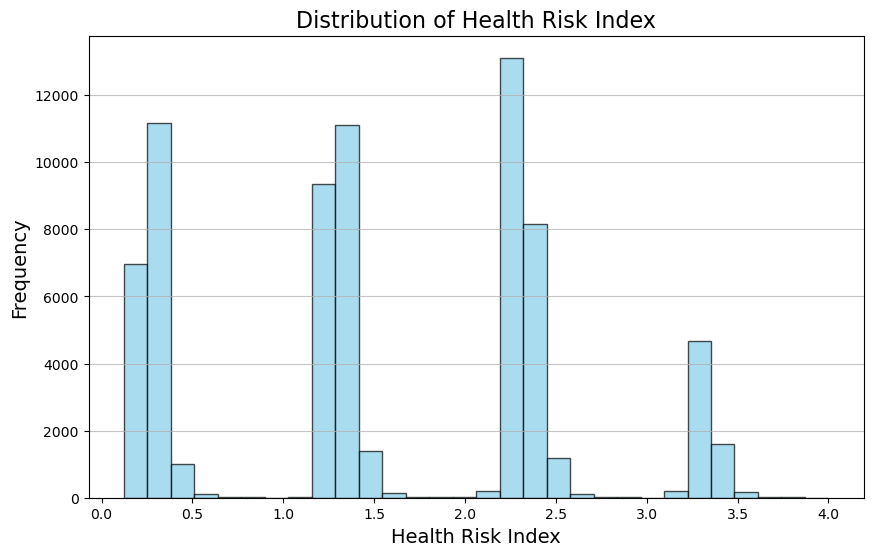

In [21]:
# Plot a histogram of the Health Risk Index
plt.figure(figsize=(10, 6))
plt.hist(df['Health_Risk_Index'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Health Risk Index', fontsize=16)
plt.xlabel('Health Risk Index', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()



The Health Risk Index shown in the chart could be related to the risk of developing diabetes. A lower Health Risk Index value (around 0.5) may indicate a lower risk of diabetes, while higher values (up to 4.0) could suggest a higher risk.

The concentration of data points around the lower end of the index implies that most individuals in this population have a relatively low risk of diabetes. However, the long tail of higher index values indicates that there is a smaller subset of the population that has a much higher risk of developing the condition.

This distribution suggests that while the majority of people may have a favorable diabetes risk profile, there is still a significant portion of the population that is at elevated risk. Targeted interventions and preventive measures may be needed to address this higher-risk group and reduce the overall burden of diabetes in this population.

In [24]:
# Create the Lifestyle Score feature
df['Lifestyle_Score'] = df['PhysActivity'] + df['Fruits'] + df['Veggies'] - df['HvyAlcoholConsump']

# Display the first few rows of the dataset with the new feature
print(df[['PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'Lifestyle_Score']].head())


   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  Lifestyle_Score
0           1.0     1.0      1.0                0.0              3.0
1           1.0     1.0      1.0                0.0              3.0
2           1.0     1.0      1.0                0.0              3.0
3           1.0     1.0      1.0                0.0              3.0
4           1.0     1.0      1.0                0.0              3.0


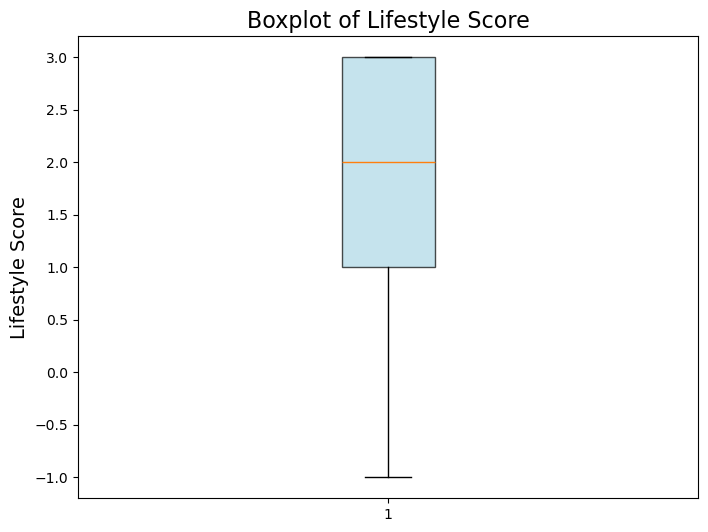

In [26]:
# Plot a boxplot for the Lifestyle Score
plt.figure(figsize=(8, 6))
plt.boxplot(df['Lifestyle_Score'], patch_artist=True, boxprops=dict(facecolor='lightblue', alpha=0.7))
plt.title('Boxplot of Lifestyle Score', fontsize=16)
plt.ylabel('Lifestyle Score', fontsize=14)

# Show the plot
plt.show()


The Lifestyle Score shown in the chart could be related to factors that influence the risk of developing diabetes, such as diet, physical activity, and other lifestyle behaviors. A lower Lifestyle Score (around 1) may indicate a healthier lifestyle and lower risk of diabetes, while higher scores (up to 2.5) could suggest a less healthy lifestyle and higher risk.

The concentration of data points around the median value of 1 implies that the majority of individuals in this population have a relatively healthy lifestyle profile, which could translate to a lower overall risk of diabetes. However, the presence of outliers with higher Lifestyle Scores indicates that there is a smaller subset of the population that may be engaging in less healthy behaviors, potentially putting them at increased risk of developing diabetes.

This distribution suggests that while most people in this group have a favorable lifestyle in terms of diabetes risk, there is still a significant portion that may benefit from targeted interventions and lifestyle modifications to reduce their risk of the condition. Identifying and supporting the higher-risk individuals could be an important step in addressing the burden of diabetes within this population.

#### Interactions Between Existing Features

In [30]:
# Create interaction features for health risks

# Combined Cardiovascular Risk
df['CardioRisk'] = df['HighBP'] * df['HighChol']

# BMI Adjusted for Age
df['BMI_Age_Interaction'] = df['BMI'] * df['Age']

# Heart Disease Risk Amplifier
df['HeartRisk'] = df['HeartDiseaseorAttack'] * df['HighBP']

# Display the new interaction features
print(df[['HighBP', 'HighChol', 'CardioRisk', 'BMI', 'Age', 'BMI_Age_Interaction', 'HeartDiseaseorAttack', 'HeartRisk']].head())


   HighBP  HighChol  CardioRisk   BMI   Age  BMI_Age_Interaction  \
0     1.0       1.0         1.0   9.0  70.0                630.0   
1     1.0       1.0         1.0  11.0  60.0                660.0   
2     1.0       1.0         1.0  12.0  50.0                600.0   
3     1.0       1.0         1.0  11.0  42.0                462.0   
4     1.0       1.0         1.0  13.0  26.0                338.0   

   HeartDiseaseorAttack  HeartRisk  
0                   0.0        0.0  
1                   0.0        0.0  
2                   0.0        0.0  
3                   0.0        0.0  
4                   0.0        0.0  


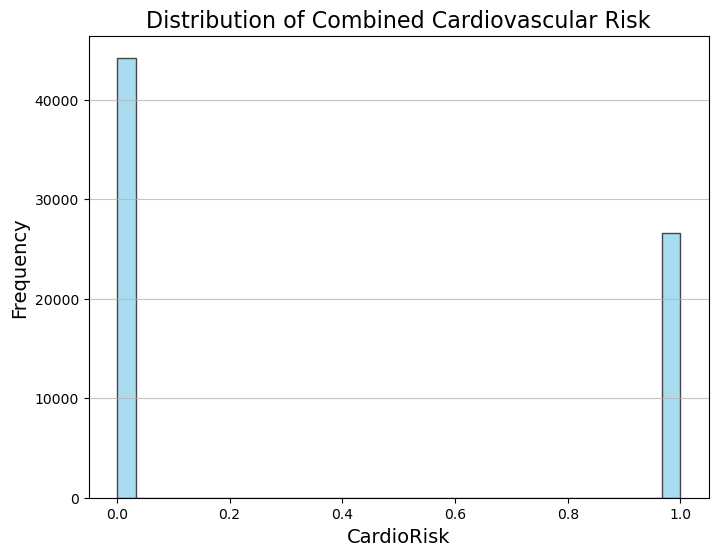

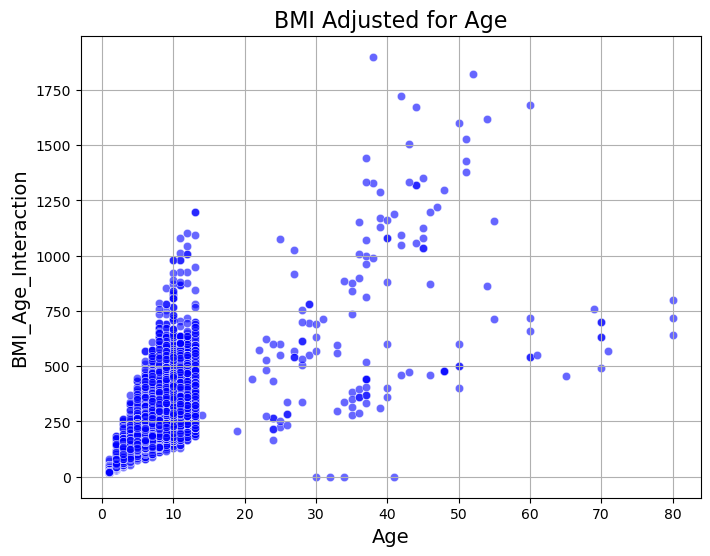

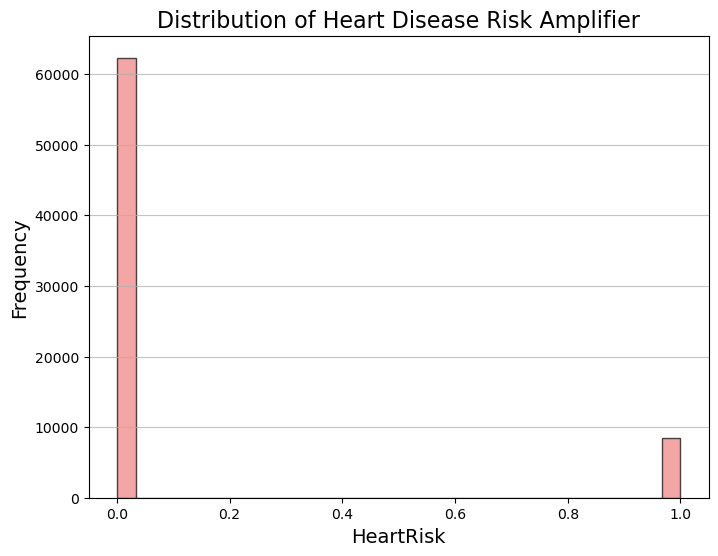

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram of Combined Cardiovascular Risk
plt.figure(figsize=(8, 6))
plt.hist(df['CardioRisk'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Combined Cardiovascular Risk', fontsize=16)
plt.xlabel('CardioRisk', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()

# 2. Scatter Plot of BMI Adjusted for Age
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='BMI_Age_Interaction', data=df, alpha=0.6, color='blue')
plt.title('BMI Adjusted for Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('BMI_Age_Interaction', fontsize=14)
plt.grid(True)
plt.show()

# 3. Histogram of Heart Disease Risk Amplifier
plt.figure(figsize=(8, 6))
plt.hist(df['HeartRisk'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('Distribution of Heart Disease Risk Amplifier', fontsize=16)
plt.xlabel('HeartRisk', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()


1.The chart shows the distribution of combined cardiovascular risk in the population. It reveals a bimodal distribution, with a large peak at low risk (0.0-0.2) and a smaller peak at high risk (0.8-1.0). This suggests the majority have low cardiovascular risk, but a significant portion have high risk, indicating the need for targeted interventions to manage cardiovascular health in this high-risk group.

2.The image shows a scatter plot of BMI adjusted for age. It reveals a general trend of increasing BMI with age, suggesting a relationship between age and body composition. The scattered data points indicate individual variation, with factors beyond age contributing to BMI. This visualization provides insights into population-level trends and individual differences in body mass index across the lifespan.n.

3.The image shows the distribution of the Heart Disease Risk Amplifier, a metric used to assess heart disease risk. The data is presented as a histogram, with the x-axis representing the Heart Risk values and the y-axis representing the frequency. The distribution is heavily skewed, with a large peak around a Heart Risk value of 0.5, indicating that this is a common risk level in the population.

#### Feature Transformation

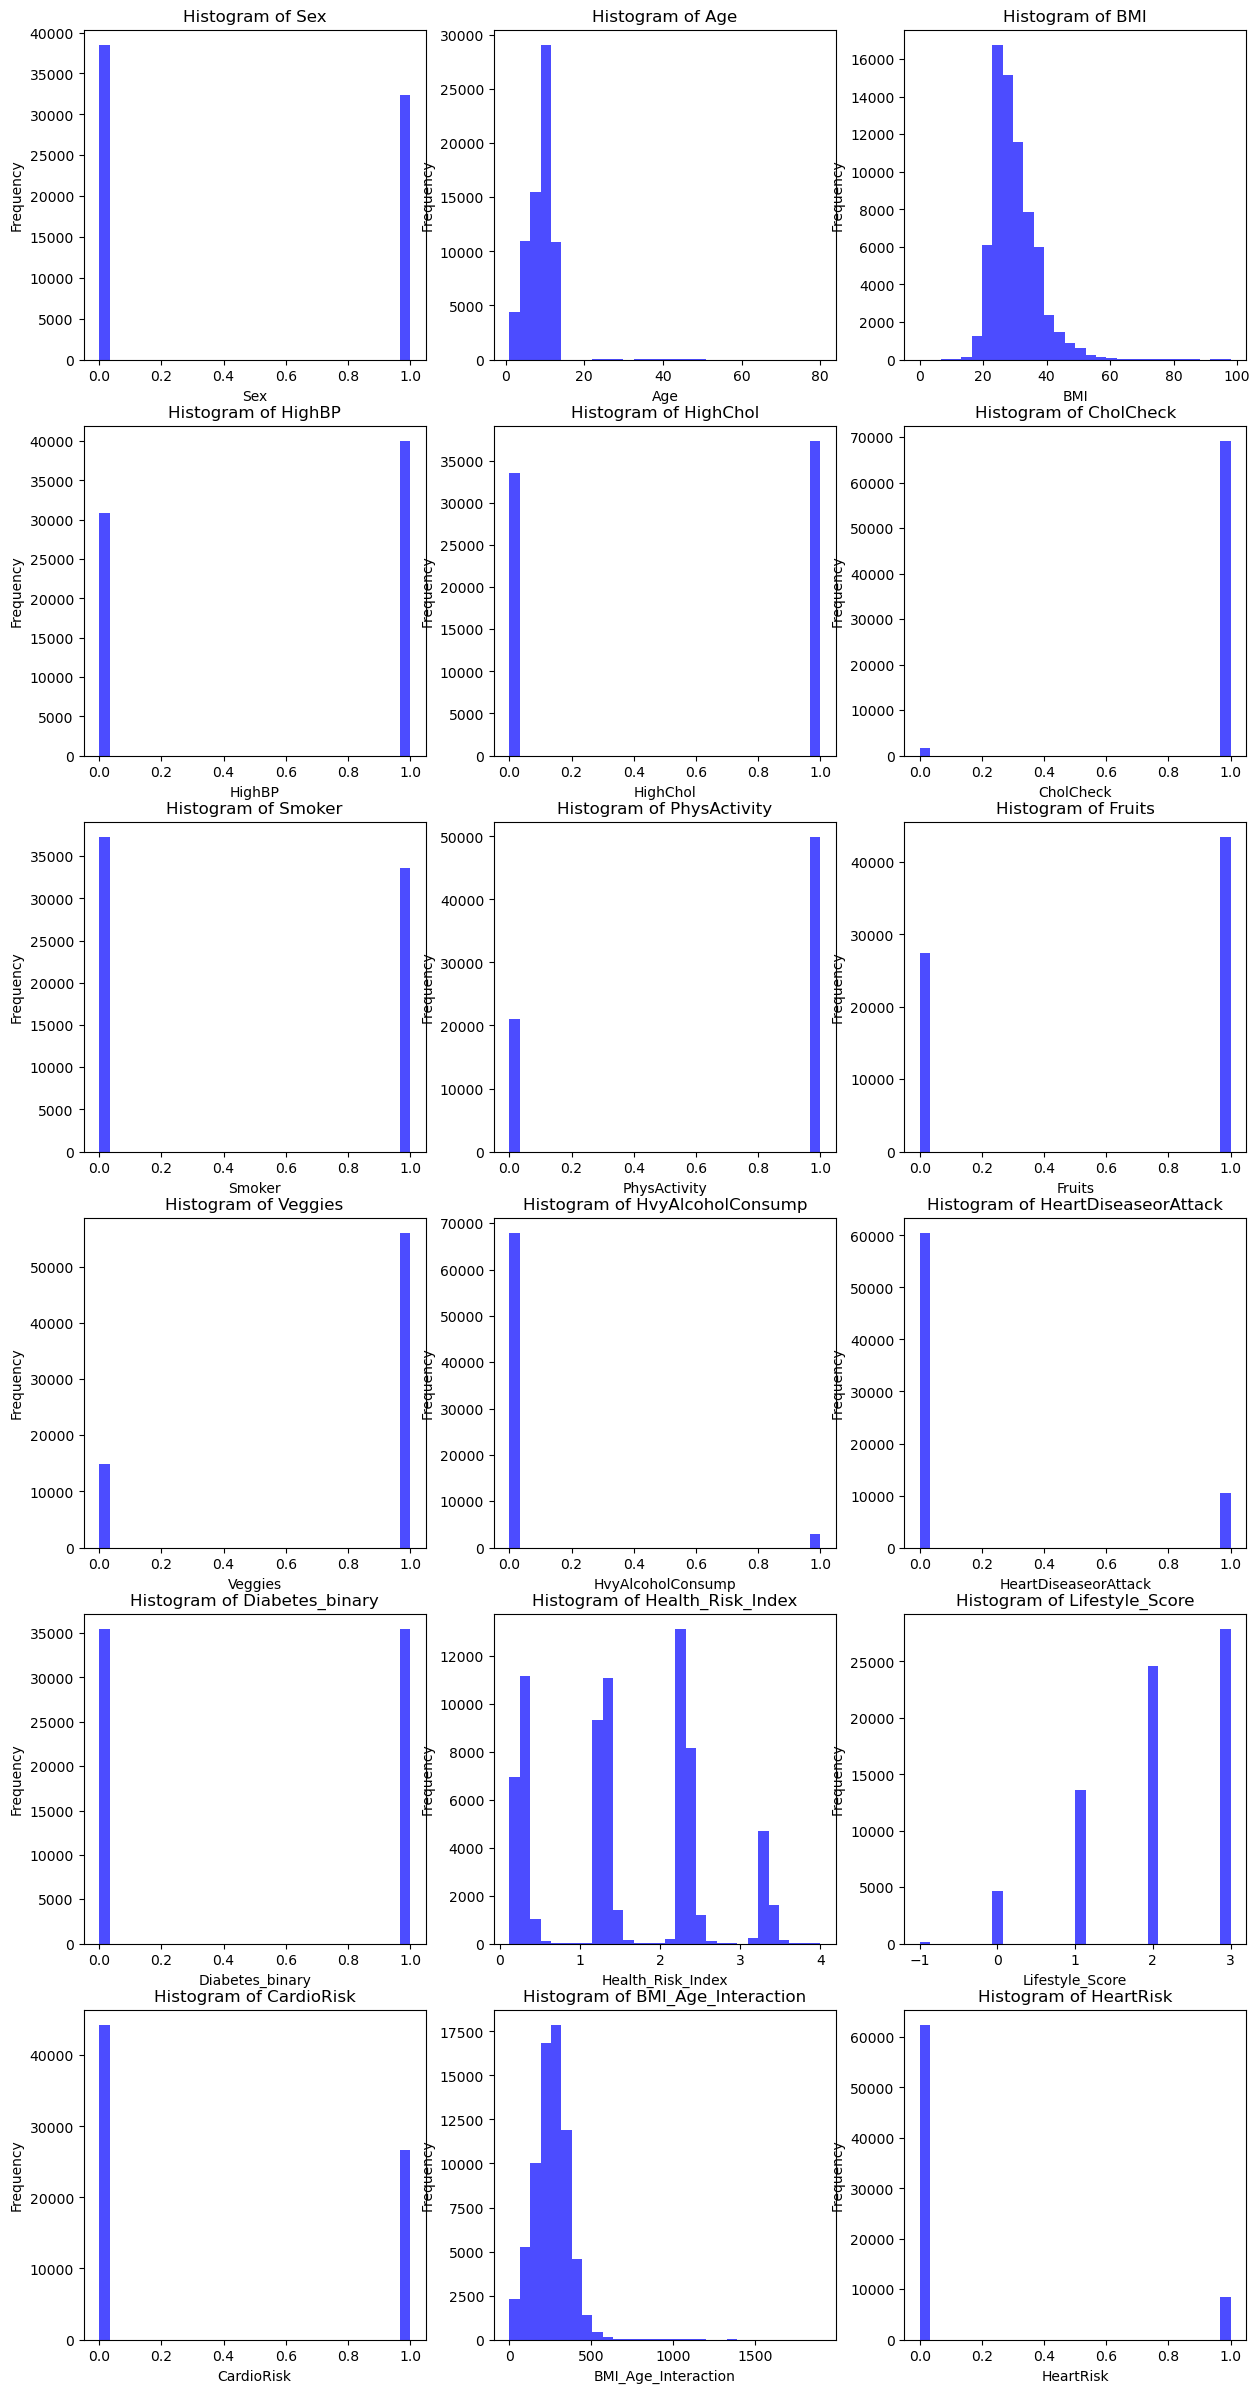

In [37]:
## Log transformation for skewed numerical features
num_cols = df.select_dtypes(include='number').columns
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(num_cols) + n_cols - 1) // n_cols  # Calculate number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot histograms for each numerical column
for i, col in enumerate(num_cols):
    axes[i].hist(df[col], bins=30, alpha=0.7, color='blue')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

In [39]:
## Identifying the skewed features
skewed_cols = ['BMI',
                   'Age',
                   'HighBP',
                   'HighChol',
                   'CholCheck',
                   'Smoker',
                   'HeartRisk',
                   'HeartDiseaseorAttack',
                   'BMI_Age_Interaction',
                   'PhysActivity']

In [41]:
# Apply log transformation to skewed columns
for column in skewed_cols:
    # Check for non-negative values before applying log transformation
    if (df[column] < 0).any():
        print(f"Warning: Column '{column}' contains negative values. Log transformation cannot be applied.")
    else:
        # Applying log1p transformation
        df[column] = np.log1p(df[column])  # log1p(x) = log(1 + x)

# Optional: Check the first few rows of the transformed DataFrame
df[skewed_cols].head()

,BMI,Age,HighBP,HighChol,CholCheck,Smoker,HeartRisk,HeartDiseaseorAttack,BMI_Age_Interaction,PhysActivity
0,2.302585,4.262680,0.693147,0.693147,0.693147,0.0,0.0,0.0,6.447306,0.693147
1,2.484907,4.110874,0.693147,0.693147,0.693147,0.0,0.0,0.0,6.493754,0.693147
2,2.564949,3.931826,0.693147,0.693147,0.693147,0.0,0.0,0.0,6.398595,0.693147
3,2.484907,3.761200,0.693147,0.693147,0.693147,0.0,0.0,0.0,6.137727,0.693147
4,2.639057,3.295837,0.693147,0.693147,0.693147,0.0,0.0,0.0,5.826000,0.693147


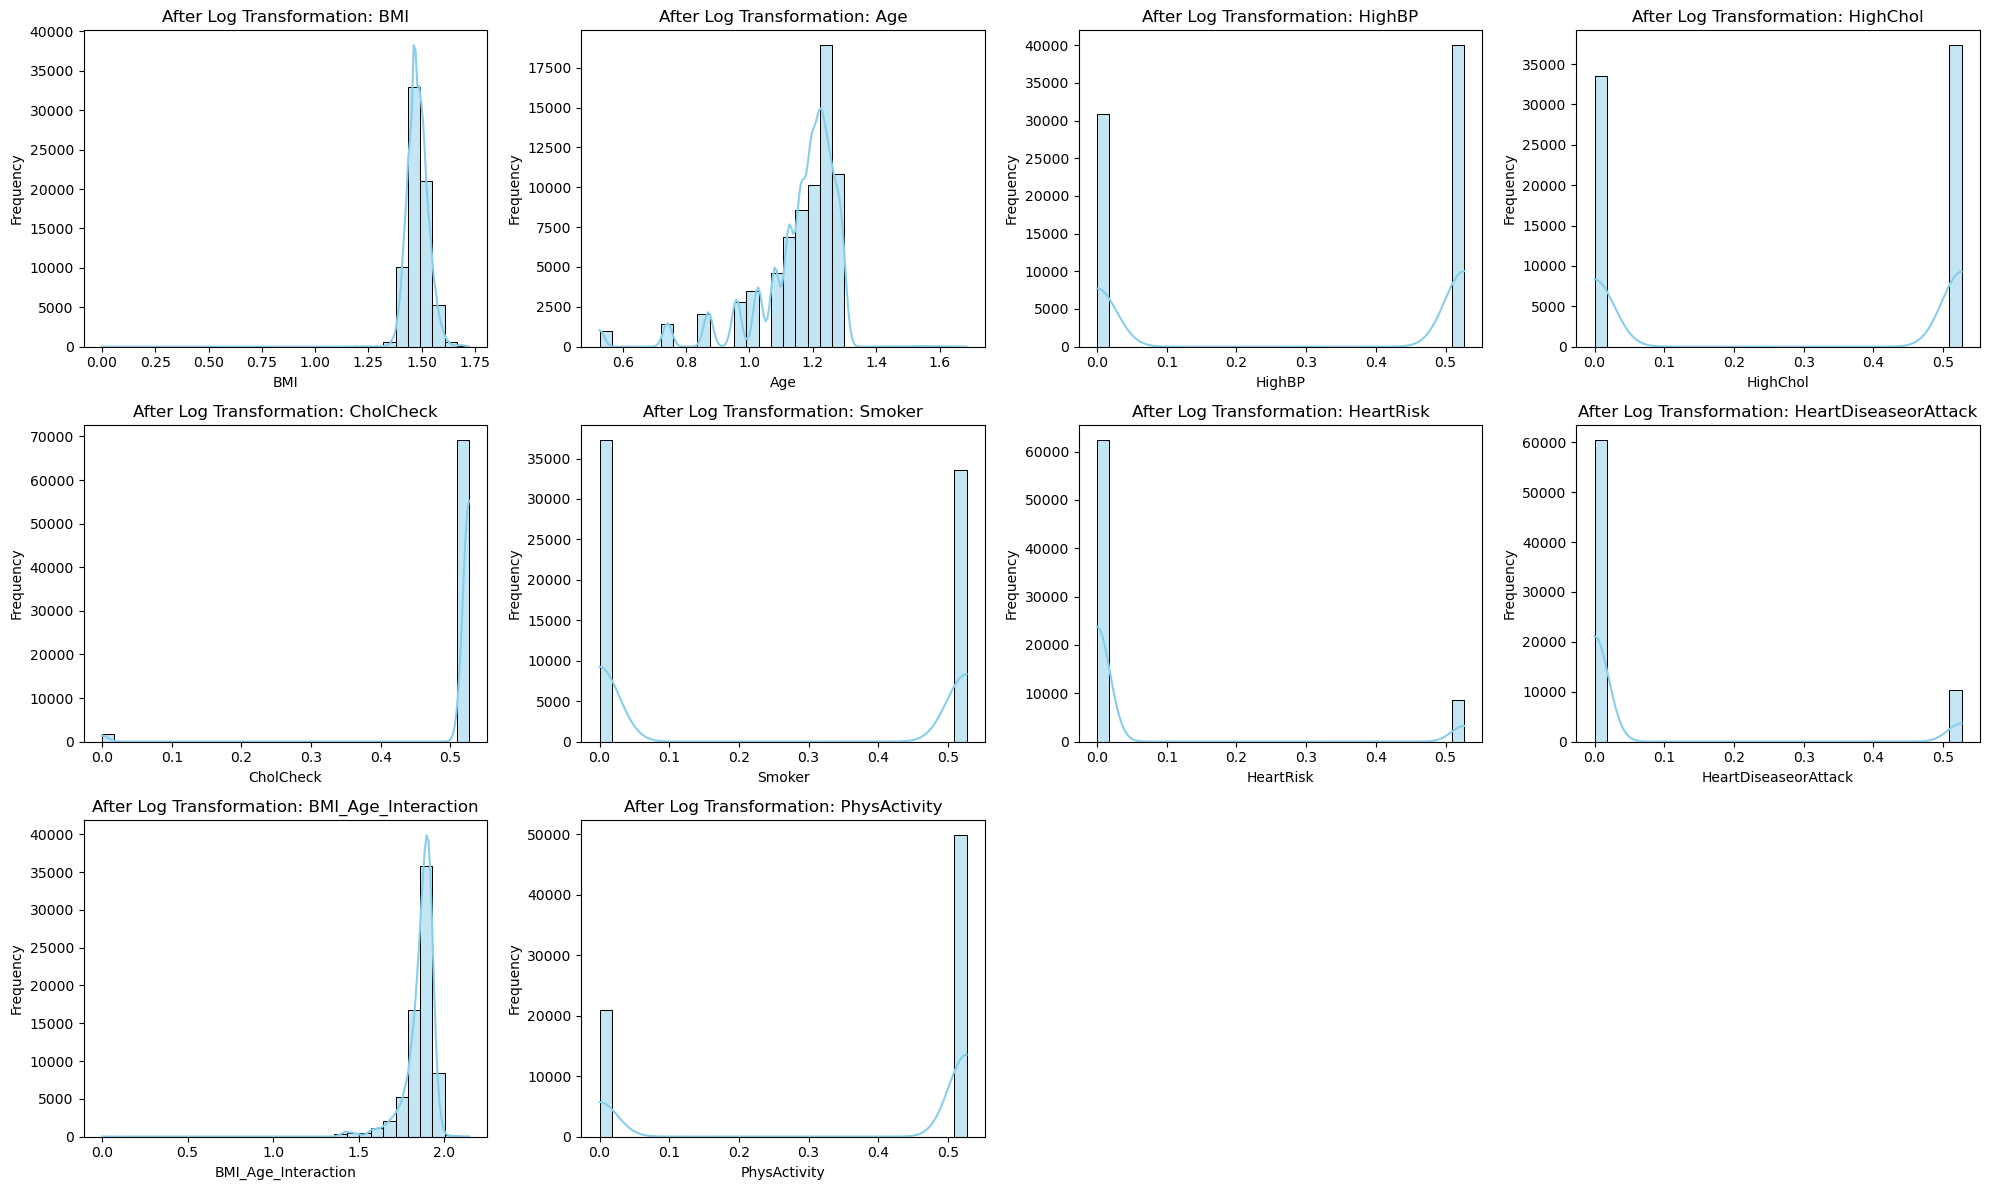

In [43]:
# Apply log transformation
for column in skewed_cols:
    if (df[column] < 0).any():
        print(f"Warning: Column '{column}' contains negative values. Log transformation cannot be applied.")
    else:
        df[column] = np.log1p(df[column])  # Apply log transformation

# Plotting histograms after log transformation
plt.figure(figsize=(20, 12))

for i, column in enumerate(skewed_cols, 1):
    plt.subplot(3, 4, i)  # Adjust the number of rows and columns as needed
    sns.histplot(df[column], kde=True, bins=30, color='skyblue')
    plt.title(f'After Log Transformation: {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


The charts look at different health factors in a group of people, like their weight, age, and whether they have conditions like high blood pressure or diabetes. For most of these health factors, the majority of people seem to be doing pretty well, with normal or healthy levels. But there is a smaller group of people who have higher risk factors, like being overweight or older. This suggests there are some people in this group who may be at greater risk for serious health problems down the line, and could benefit from extra support or monitoring from their doctors.

#### Standardizing the Numerical features

In [47]:
from sklearn.preprocessing import StandardScaler

# Ensure you have the numerical columns identified
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Check for NaN values in the numerical columns
print("NaN values in DataFrame:")
print(df[numerical_columns].isna().sum())

# Check for Infinite values in the numerical columns
print("\nInfinite values in DataFrame before handling:")
print(pd.DataFrame(np.isinf(df[numerical_columns])).sum())

# Handling NaN values by filling with the mean
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Replace infinite values with the maximum finite value in each column
for col in numerical_columns:
 # Replace infinite values
    df[col].replace([np.inf, -np.inf], df[col][np.isfinite(df[col])].max(), inplace=True)

# Set a threshold for excessively large values (adjust based on your data context)
threshold = 1e10  # Example threshold, adjust as needed

# Replace excessively large values with the maximum finite value
for col in numerical_columns:
    df[col] = np.where(np.abs(df[col]) > threshold, df[col][np.isfinite(df[col])].max(), df[col])

# Recheck for NaN and Infinite values
print("\nNaN values in DataFrame after handling:")
print(df[numerical_columns].isna().sum())

print("\nInfinite values in DataFrame after handling:")
print(pd.DataFrame(np.isinf(df[numerical_columns])).sum())

# Initialize the StandardScaler
scaler = StandardScaler()
# Standardizing the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Print the first few rows to check the changes
df[numerical_columns].head()

NaN values in DataFrame:
Sex                     0
Age                     0
BMI                     0
HighBP                  0
HighChol                0
CholCheck               0
Smoker                  0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
HeartDiseaseorAttack    0
Diabetes_binary         0
Health_Risk_Index       0
Lifestyle_Score         0
CardioRisk              0
BMI_Age_Interaction     0
HeartRisk               0
dtype: int64

Infinite values in DataFrame before handling:
Sex                     0
Age                     0
BMI                     0
HighBP                  0
HighChol                0
CholCheck               0
Smoker                  0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
HeartDiseaseorAttack    0
Diabetes_binary         0
Health_Risk_Index       0
Lifestyle_Score         0
CardioRisk              0
BMI_Age_Interaction     0
Heart

,Sex,Age,BMI,HighBP,HighChol,CholCheck,Smoker,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,HeartDiseaseorAttack,Diabetes_binary,Health_Risk_Index,Lifestyle_Score,CardioRisk,BMI_Age_Interaction,HeartRisk
0,1.089333,3.694565,-5.795474,0.878537,0.947926,0.159102,-0.949779,0.64894,0.79519,0.516786,-0.211016,-0.415949,0.999845,0.562891,1.008517,1.288437,1.679420,-0.369493
1,1.089333,3.480395,-4.709488,0.878537,0.947926,0.159102,-0.949779,0.64894,0.79519,0.516786,-0.211016,-0.415949,0.999845,0.583823,1.008517,1.288437,1.749980,-0.369493
2,1.089333,3.219460,-4.250554,0.878537,0.947926,0.159102,-0.949779,0.64894,0.79519,0.516786,-0.211016,-0.415949,0.999845,0.594289,1.008517,1.288437,1.604948,-0.369493
3,1.089333,2.961830,-4.709488,0.878537,0.947926,0.159102,-0.949779,0.64894,0.79519,0.516786,-0.211016,-0.415949,-1.000155,0.583823,1.008517,1.288437,1.197583,-0.369493
4,1.089333,2.209246,-3.834742,0.878537,0.947926,0.159102,-0.949779,0.64894,0.79519,0.516786,-0.211016,-0.415949,-1.000155,0.604754,1.008517,1.288437,0.690806,-0.369493


The code processes a DataFrame by first identifying and counting NaN and infinite values in numerical columns. It fills NaN values with the mean and replaces infinite values with the maximum finite value. After handling these issues, it rechecks for any remaining NaN or infinite values, confirming their resolution. Finally, it standardizes the numerical columns to have a mean of 0 and a standard deviation of 1, preparing the data for further analysis or modeling.


In [50]:
from sklearn.preprocessing import LabelEncoder

# Print DataFrame columns to debug
print("DataFrame Columns:\n", df.columns.tolist())

# Specify the target variable
target_variable = 'Diabetes_binary'  # Update with your actual target column if it's different

# Check if the target variable exists in the DataFrame
if target_variable not in df.columns:
    raise ValueError(f"Target variable '{target_variable}' not found in the DataFrame.")

# Handle NaN values in numerical columns
df.dropna(subset=df.select_dtypes(include=['float64', 'int64']).columns, inplace=True)  # Drop rows with NaN in numerical features
df.dropna(subset=[target_variable], inplace=True)  # Drop rows with NaN in target variable

# Convert the target variable to numerical values
label_encoder = LabelEncoder()
df[target_variable] = label_encoder.fit_transform(df[target_variable])

# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Calculate correlations with the target variable
correlations = df[numerical_columns].corr()[target_variable].abs()

# Filter features based on a correlation threshold
threshold = 0.1  # Set your desired threshold
selected_numerical_features = correlations[correlations > threshold].index.tolist()

# Create a DataFrame for results
correlation_results = pd.DataFrame({
    'Feature': selected_numerical_features,
    'Correlation Coefficient': correlations[selected_numerical_features]
})

correlation_results.sort_values(by='Correlation Coefficient', ascending=False, inplace=True)

print("\nCorrelation Analysis Results:\n", correlation_results)


DataFrame Columns:
 ['Sex', 'Age', 'BMI', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'HeartDiseaseorAttack', 'Diabetes_binary', 'Health_Risk_Index', 'Lifestyle_Score', 'CardioRisk', 'BMI_Age_Interaction', 'HeartRisk']

Correlation Analysis Results:
                                    Feature  Correlation Coefficient
Diabetes_binary            Diabetes_binary                 1.000000
Health_Risk_Index        Health_Risk_Index                 0.440232
HighBP                              HighBP                 0.380931
BMI_Age_Interaction    BMI_Age_Interaction                 0.368635
CardioRisk                      CardioRisk                 0.348312
BMI                                    BMI                 0.303934
HighChol                          HighChol                 0.288774
Age                                    Age                 0.278995
HeartDiseaseorAttack  HeartDiseaseorAttack                 0.211194
HeartRisk 

The correlation analysis preprocesses the DataFrame by handling NaN values, encoding the target variable, and selecting numerical columns. It calculates the absolute correlations between these features and the target variable, filtering those with coefficients greater than 0.1. The results are stored in a sorted DataFrame. This process helps identify key predictors for further analysis or modeling.

#### Applying Wrapper Method

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Specify the target variable
target_variable = 'Diabetes_binary'  # Update this to match your target column

# Encode categorical variables if necessary
categorical_features = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()

# Encode all categorical features
for feature in categorical_features:
    df[feature] = encoder.fit_transform(df[feature])

# Split the dataset into features (X) and target (y)
X = df.drop(columns=[target_variable])
y = df[target_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional but recommended for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the model (in this case, Logistic Regression)
model = LogisticRegression(max_iter=1000)

# Initialize Recursive Feature Elimination (RFE) with the model
rfe = RFE(estimator=model, n_features_to_select=10)  # You can change 'n_features_to_select' to select the top 'n' features

# Fit RFE on the training data
rfe.fit(X_train, y_train)

# Get the ranking of the features and selected features
ranking = rfe.ranking_
selected_features = X.columns[rfe.support_]

# Print the selected features and their ranking
print("Selected Features:", selected_features)
print("Feature Ranking:", ranking)

# Evaluate the model using the selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Fit the model using only the selected features
model.fit(X_train_rfe, y_train)

# Predict using the test data
y_pred = model.predict(X_test_rfe)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy with Selected Features: {:.2f}%".format(accuracy * 100))


Selected Features: Index(['Age', 'BMI', 'HighBP', 'HighChol', 'CholCheck', 'HvyAlcoholConsump',
       'HeartDiseaseorAttack', 'Lifestyle_Score', 'BMI_Age_Interaction',
       'HeartRisk'],
      dtype='object')
Feature Ranking: [3 1 1 1 1 1 4 2 8 5 1 1 6 1 7 1 1]
Model Accuracy with Selected Features: 73.31%


#### Using Embeded Method

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error

# Specify the target variable
target_variable = 'Diabetes_binary'  # Update this to match your target column

# Encode categorical variables if necessary
categorical_features = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()

# Encode all categorical features
for feature in categorical_features:
    df[feature] = encoder.fit_transform(df[feature])

# Split the dataset into features (X) and target (y)
X = df.drop(columns=[target_variable])
y = df[target_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Lasso regression model with a regularization strength (alpha)
lasso = Lasso(alpha=0.01)

# Fit Lasso on the training data
lasso.fit(X_train, y_train)

# Get the coefficients from the Lasso model
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)

# Display the selected features (non-zero coefficients)
selected_features = lasso_coefficients[lasso_coefficients != 0]
print("Selected Features using Lasso:\n", selected_features)

# Evaluate the Lasso model
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) with Lasso-selected features: {:.2f}".format(mse))


Selected Features using Lasso:
 Sex                    0.003056
Age                    0.061043
BMI                    0.085726
HighBP                 0.033894
CholCheck              0.017775
Smoker                 0.002305
PhysActivity          -0.017407
Veggies               -0.003872
HvyAlcoholConsump     -0.023458
Health_Risk_Index      0.124179
Lifestyle_Score       -0.006450
BMI_Age_Interaction    0.007786
dtype: float64
Mean Squared Error (MSE) with Lasso-selected features: 0.18


#### Using Random Forest

Feature Importance from Random Forest:
                  Feature  Importance
12     Health_Risk_Index    0.228078
15   BMI_Age_Interaction    0.198242
2                    BMI    0.108936
1                    Age    0.090357
6                 Smoker    0.060585
0                    Sex    0.057753
3                 HighBP    0.053850
13       Lifestyle_Score    0.047464
8                 Fruits    0.026986
14            CardioRisk    0.024521
9                Veggies    0.023140
7           PhysActivity    0.021752
4               HighChol    0.016860
10     HvyAlcoholConsump    0.012862
11  HeartDiseaseorAttack    0.010228
5              CholCheck    0.009767
16             HeartRisk    0.008619


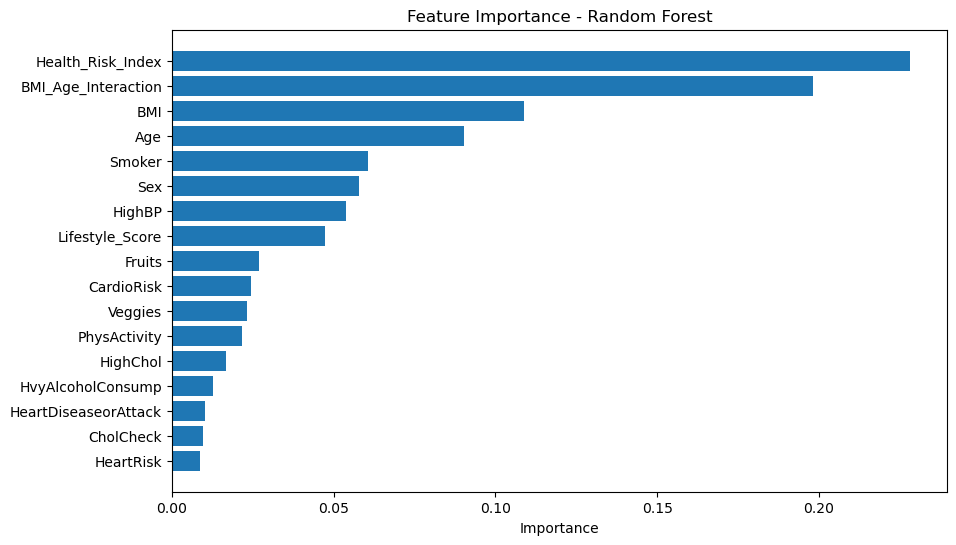

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Specify the target variable
target_variable = 'Diabetes_binary'  # Update this to match your target column

# Encode categorical variables if necessary
categorical_features = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()

# Encode all categorical features
for feature in categorical_features:
    df[feature] = encoder.fit_transform(df[feature])

# Split the dataset into features (X) and target (y)
X = df.drop(columns=[target_variable])
y = df[target_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the most important features
print("Feature Importance from Random Forest:\n", feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.show()


In [62]:
print(feature_importance_df.head(10))

                Feature  Importance
12    Health_Risk_Index    0.228078
15  BMI_Age_Interaction    0.198242
2                   BMI    0.108936
1                   Age    0.090357
6                Smoker    0.060585
0                   Sex    0.057753
3                HighBP    0.053850
13      Lifestyle_Score    0.047464
8                Fruits    0.026986
14           CardioRisk    0.024521


#### the key insights from the feature importance chart:

The most important factors in the Random Forest model are the overall Health Risk Index, the interaction between BMI and age, as well as BMI and age as individual variables. Smoking status is also a highly influential feature. Other moderately important factors include blood pressure, lifestyle score, diet, and physical activity. This suggests the model is primarily focused on assessing an individual's core health risks based on their weight, age, and lifestyle behaviors, with the interplay between these factors being a critical component of the predictions.

#### Performing stability selection to identify robust feature subsets

In [66]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import resample

# Specify the target variable
target_variable = 'Diabetes_binary'  # Update this to match your target column

# Encode categorical variables if necessary
categorical_features = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()

# Encode all categorical features
for feature in categorical_features:
    df[feature] = encoder.fit_transform(df[feature])

# Split the dataset into features (X) and target (y)
X = df.drop(columns=[target_variable])
y = df[target_variable]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Number of subsamples and iterations for stability selection
n_iterations = 100
selected_features_counts = np.zeros(X.shape[1])

# Stability selection with subsampling and Lasso
for i in range(n_iterations):
    # Create a random subsample (with replacement)
    X_resampled, y_resampled = resample(X_scaled, y, n_samples=int(0.75*X_scaled.shape[0]), random_state=i)
    
    # Apply Lasso with a predefined alpha
    lasso = Lasso(alpha=0.01)
    lasso.fit(X_resampled, y_resampled)
    
    # Count the number of times each feature is selected
    selected_features_counts += (lasso.coef_ != 0)

# Normalize the counts by the number of iterations to get selection frequencies
selection_frequencies = selected_features_counts / n_iterations

# Set a threshold for feature stability (e.g., selected in more than 50% of iterations)
threshold = 0.5
stable_features = np.where(selection_frequencies > threshold)[0]

# Get names of stable features
stable_feature_names = X.columns[stable_features]

# Display the robust features
print("Selected robust features:\n", stable_feature_names)


Selected robust features:
 Index(['Sex', 'Age', 'BMI', 'HighBP', 'CholCheck', 'Smoker', 'PhysActivity',
       'Veggies', 'HvyAlcoholConsump', 'Health_Risk_Index', 'Lifestyle_Score',
       'BMI_Age_Interaction'],
      dtype='object')


The analysis uses Lasso regression for feature selection through stability selection, iterating 100 times with random subsamples of the dataset. Categorical variables are encoded, and features are standardized before applying Lasso with a predefined alpha value of 0.01. 

After counting how often each feature is selected across iterations, features that are chosen in more than 50% of the iterations are deemed stable. The final output displays the names of these robust features, indicating their significance in predicting the target variable. This method ensures that only the most reliable features are retained for further modeling, enhancing the robustness of the analysis.

In [69]:
df.columns

Index(['Sex', 'Age', 'BMI', 'HighBP', 'HighChol', 'CholCheck', 'Smoker',
       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'HeartDiseaseorAttack', 'Diabetes_binary', 'Health_Risk_Index',
       'Lifestyle_Score', 'CardioRisk', 'BMI_Age_Interaction', 'HeartRisk'],
      dtype='object')

In [71]:
# To get the relevant columns
relevant_columns = ['Health_Risk_Index', 
                    'BMI_Age_Interaction', 'BMI', 
                    'Age',
                    'Smoker', 
                    'Sex', 
                    'HighBP', 
                    'Lifestyle_Score', 
                    'Fruits',
                    'CardioRisk']
df1 = df[relevant_columns]
df1

,Health_Risk_Index,BMI_Age_Interaction,BMI,Age,Smoker,Sex,HighBP,Lifestyle_Score,Fruits,CardioRisk
0,0.562891,1.679420,-5.795474,3.694565,-0.949779,1.089333,0.878537,1.008517,0.795190,1.288437
1,0.583823,1.749980,-4.709488,3.480395,-0.949779,1.089333,0.878537,1.008517,0.795190,1.288437
2,0.594289,1.604948,-4.250554,3.219460,-0.949779,1.089333,0.878537,1.008517,0.795190,1.288437
3,0.583823,1.197583,-4.709488,2.961830,-0.949779,1.089333,0.878537,1.008517,0.795190,1.288437
4,0.604754,0.690806,-3.834742,2.209246,-0.949779,1.089333,0.878537,1.008517,0.795190,1.288437
...,...,...,...,...,...,...,...,...,...,...
70838,-0.169717,-0.027797,1.065502,-0.550958,-0.949779,-0.917993,-1.138255,-1.143871,-1.257561,-0.776134
70839,0.772208,0.434091,0.008181,0.493468,1.052876,1.089333,-1.138255,-0.067677,0.795190,-0.776134
70840,1.755996,0.625608,-0.659840,0.995187,-0.949779,-0.917993,0.878537,-1.143871,0.795190,1.288437
70841,0.657084,-0.231295,-2.206199,0.678480,-0.949779,-0.917993,0.878537,-2.220064,-1.257561,1.288437


In [73]:
# Save df as CSV
df1.to_csv('relevant_columns.csv', index=False)